# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
from scipy import optimize

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import my own code
import inauguralproject

# Import my own model
from HouseholdSpecializationModel import HouseholdSpecializationModelClass

# I create an instance of the model
model = HouseholdSpecializationModelClass()

# Question 1

## Solving the model

I solve the model for different loops of $\alpha$ and $\sigma$ with the following values: $\alpha$={0.25,0.50,0.75} and $\sigma$={0.50,1.00,1.50}


In [2]:
# code for solving the model (remember documentation and comments)

a = np.array([1,2,3])
b = inauguralproject.square(a)
print(b)

[1 4 9]


In [3]:
#I define the alpha and sigma values:

alphaparameters = [0.25, 0.50, 0.75]
sigmaparameters = [0.5, 1.00, 1.5]


#I create a df for the values: 

dfparametervalues = pd.DataFrame(index=alphaparameters, columns=sigmaparameters)

#Create an empty list for the ratios:

ratios = []

#Create a loop over the solutions:
for alpha in alphaparameters:
    for sigma in sigmaparameters:
        #Redefine the parameters:
        model.par.alpha = alpha
        model.par.sigma = sigma
        #Solve the model for each iteration of parameters:
        solution = model.solve_discrete()
        #Create the ratio for each iteration and add to the df:
        ratios = solution.HF/solution.HM
        dfparametervalues.loc[alpha, sigma] = ratios

print(dfparametervalues)



/Users/amalietokkesdal/Documents/GitHub/projects-2023-amalietokk/inauguralproject/HouseholdSpecializationModel.py:61: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


           0.5       1.0       1.5
0.25  0.307692  0.307692  0.307692
0.50       1.0       1.0       1.0
0.75      3.25      3.25      3.25


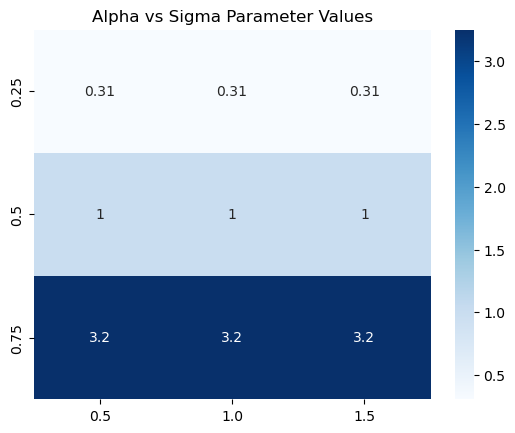

In [4]:
# Convert the data in the dataframe to float
dfparametervalues = dfparametervalues.astype(float)

sns.heatmap(dfparametervalues, annot=True, cmap='Blues')

# Set the title
plt.title('Alpha vs Sigma Parameter Values')

# Show the plot
plt.show()

This shows that the higher the sigma and the alpha values are, the more females will work compared to males. So the more specialized females are in housework and vice versa, they will work more at home. Sigma is the elasticity of substitution and will be unchagnes 

In [5]:
#I reset the model parameters: 

model.par.alpha = 0.5 
model.par.sigma = 1 

# Question 2

I solve the ratio of female to male housework for different levels of female wages, by using a loop through the different wages and storing the solutions. Afterwards I plot it in a lineplot. 

/Users/amalietokkesdal/Documents/GitHub/projects-2023-amalietokk/inauguralproject/HouseholdSpecializationModel.py:61: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


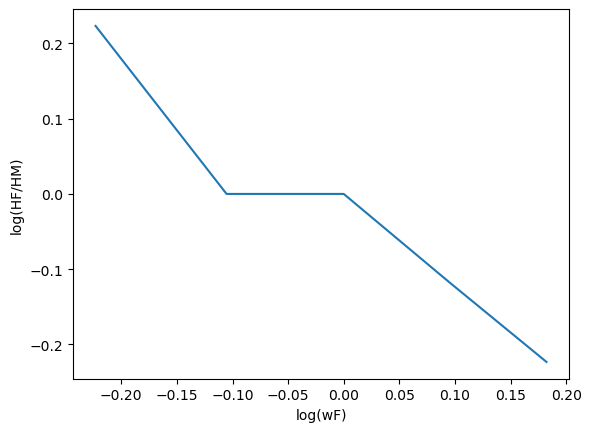

In [6]:
wF_vector = [0.8, 0.9, 1.0, 1.1, 1.2]

# initialize dictionary to store results for each female wage level
optHF = {}
optHM = {}

for wF in wF_vector:
    # define the female wage
    model.par.wF = wF
    # solve the model and store
    opt = model.solve_discrete()
    optHF[wF] = opt.HF
    optHM[wF] = opt.HM
    
# I then store the results 
fig, ax = plt.subplots()
y = []
for wF in wF_vector:
    y.append(np.log(optHF[wF]/optHM[wF]))
ax.plot(np.log(wF_vector), y)
ax.set_xlabel("log(wF)")
ax.set_ylabel("log(HF/HM)")
plt.show()

### Therefore, the higher the wage for females, the less housework they will do in comparison to the male population, as the outside option is now of higher value.

# Question 3

When assuming continuity, I use the solve function and not the discrete function to find the optimal parameters. 

/Users/amalietokkesdal/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_optimize.py:811: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


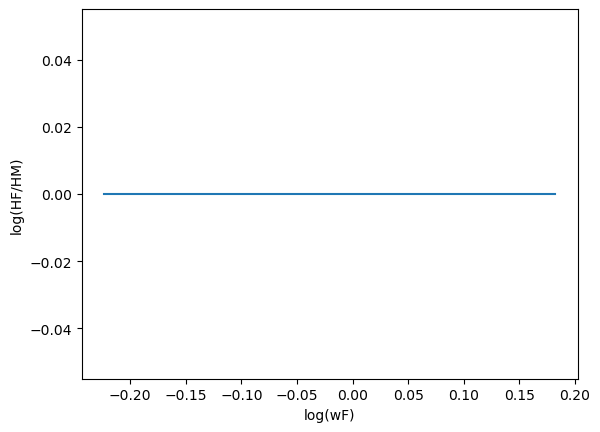

{0.8: 12.0, 0.9: 12.0, 1.0: 12.0, 1.1: 12.0, 1.2: 12.0}
{0.8: 12.0, 0.9: 12.0, 1.0: 12.0, 1.1: 12.0, 1.2: 12.0}


In [7]:
wF_vector = [0.8, 0.9, 1.0, 1.1, 1.2]

# initialize dictionary to store results
optHF = {}
optHM = {}

for i,wF in enumerate(wF_vector):
    # set values of alpha and sigma in the model
    model.par.wF = wF
        
    # solve the model and store the result
    opt = model.solve()
    optHF[wF] = opt.HF
    optHM[wF] = opt.HM

    model.sol.HF_vec[i] = opt.HF
    model.sol.HM_vec[i] = opt.HM
    model.sol.LF_vec[i] = opt.LF
    model.sol.LM_vec[i] = opt.LM

# plot the results
fig, ax = plt.subplots()
y = [np.log(optHF[wF]/optHM[wF]) for wF in wF_vector]
ax.plot(np.log(wF_vector),y)
ax.set_xlabel("log(wF)")
ax.set_ylabel("log(HF/HM)")
plt.show()


print(optHF)
print(optHM)

## Jeg forstår ikke helt hvad der går galt her?

# Question 4

In [15]:
# Set model
wF_vector = [0.8, 0.9, 1.0, 1.1, 1.2]

# Objective function
def objective_function(x):
    model.par.alpha = x[0]
    model.par.sigma = x[1]

    model.solve_wF_vec()
    model.run_regression()

    # saving beta hat values
    beta0 = model.sol.beta0
    beta1 = model.sol.beta1
    return (model.par.beta0_target - beta0)**2 + (model.par.beta1_target - beta1)**2

# Creating bounds and intitial guess
bounds = [(0,1), (0,1)]
guess = (0.5, 0.5)
result = optimize.minimize(objective_function, x0=guess, method="Nelder-Mead", bounds=bounds)
print(f'alpha = {result.x[0]:5.3f}\nsigma = {result.x[1]:5.3f}')

alpha = 0.500
sigma = 0.500
